In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df_pre = pd.read_csv('student_exam_scores.csv')

In [3]:
print(df_pre.head())

  student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3  


In [4]:
df = df_pre.drop(columns=['student_id'], errors='ignore')

print(df.head())

   hours_studied  sleep_hours  attendance_percent  previous_scores  exam_score
0            8.0          8.8                72.1               45        30.2
1            1.3          8.6                60.7               55        25.0
2            4.0          8.2                73.7               86        35.8
3            3.5          4.8                95.1               66        34.0
4            9.1          6.4                89.8               71        40.3


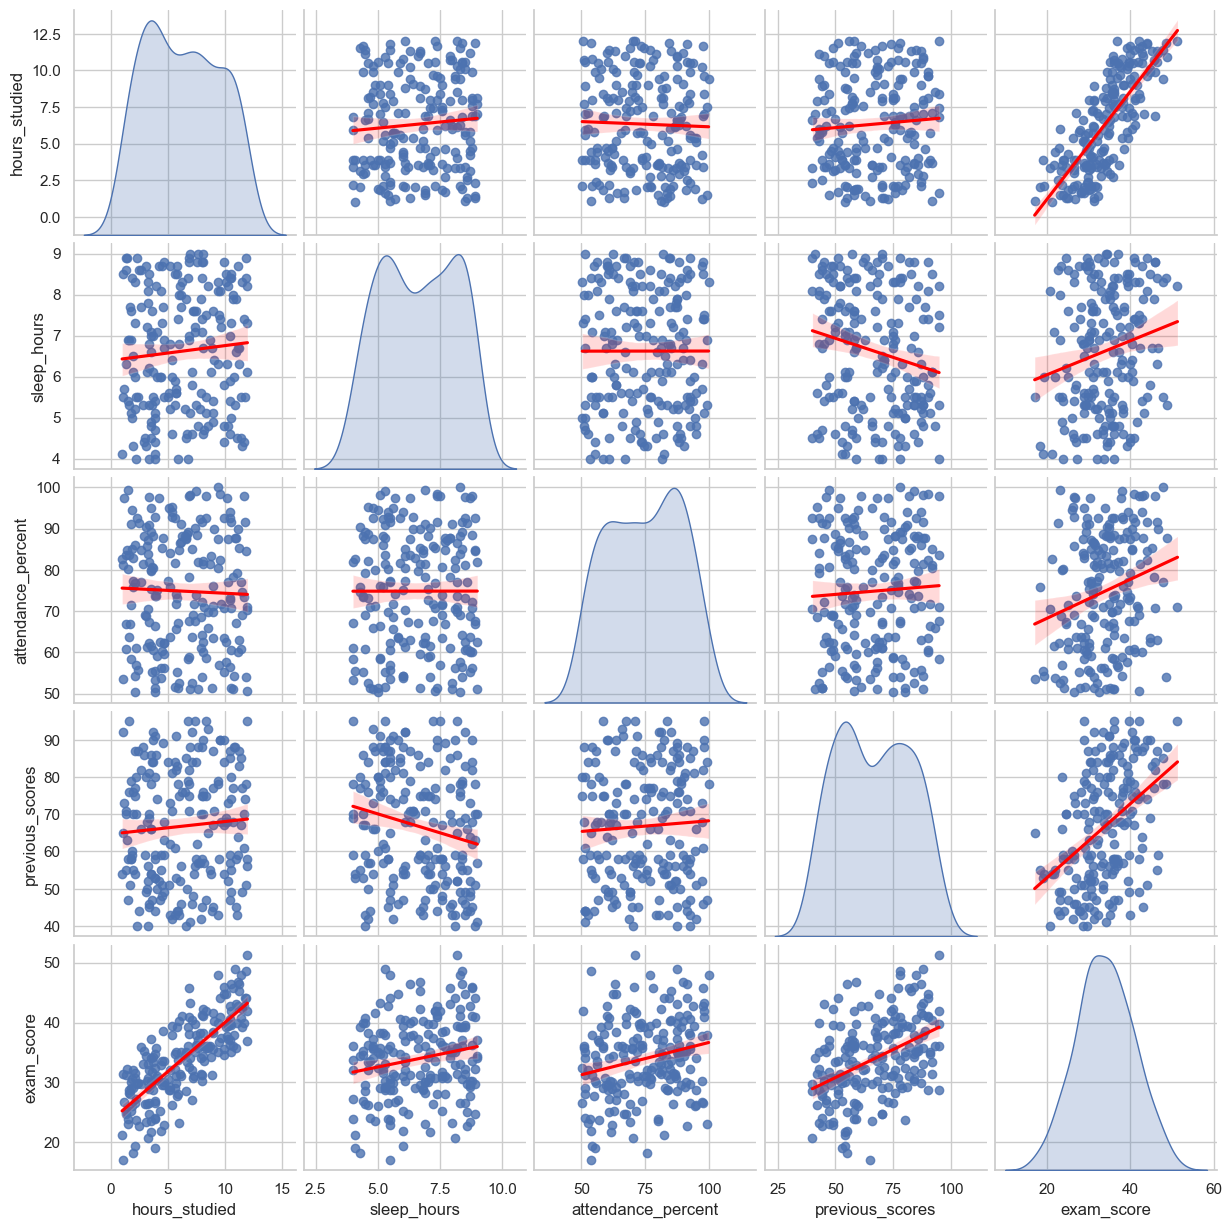

In [5]:
sns.set(style="whitegrid")

# Simple pairwise scatter plots
sns.pairplot(df, vars=["hours_studied", "sleep_hours", "attendance_percent", "previous_scores", "exam_score"], kind="reg",
             diag_kind="kde", plot_kws={"line_kws": {"color": "red"}})
plt.show()

In [9]:
means = df.mean()
means

hours_studied          6.3255
sleep_hours            6.6220
attendance_percent    74.8300
previous_scores       66.8000
exam_score            33.9550
dtype: float64

In [10]:
median = df.median()
median

hours_studied          6.15
sleep_hours            6.70
attendance_percent    75.25
previous_scores       67.50
exam_score            34.05
dtype: float64

In [11]:
var = df.var()
var

hours_studied          10.415578
sleep_hours             2.241423
attendance_percent    203.059799
previous_scores       245.356784
exam_score             46.097965
dtype: float64

In [12]:
sd = df.std()
sd

hours_studied          3.227317
sleep_hours            1.497138
attendance_percent    14.249905
previous_scores       15.663869
exam_score             6.789548
dtype: float64

In [13]:
#Creating Ind and Dep var
X = df[['hours_studied','sleep_hours', 'attendance_percent', 'previous_scores']]
y = df['exam_score']

#Split into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
print("intercept:", model.intercept_)
print("coefficients:", model.coef_)

intercept: -2.2049639058368484
coefficients: [1.54934126 0.88415643 0.10894946 0.18303355]


In [15]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 7.761782668623075
R-squared: 0.8537447137159516


In [16]:
import statsmodels.api as sm

# Fit on TRAIN
X_train_const = sm.add_constant(X_train, has_constant="add")
model_sm = sm.OLS(y_train, X_train_const).fit()
print(model_sm.summary())

# (optional) evaluate on TEST
X_test_const = sm.add_constant(X_test, has_constant="add")
y_pred = model_sm.predict(X_test_const)

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     198.2
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           7.59e-60
Time:                        19:51:09   Log-Likelihood:                -384.95
No. Observations:                 160   AIC:                             779.9
Df Residuals:                     155   BIC:                             795.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2050      1

**R-squared = 0.836 (Adj. 0.832)** → about 83% of the variance in exam_score is explained by your 4 predictors. That’s strong.

**F-statistic p-value = 7.59e-60** → the model is jointly significant; at least one coefficient is not zero.

**N = 160** → decent sample size.

**hours_studied: 1.5493 (p < 0.001):** +1 hour studied → +1.55 exam points on average. CI ≈ [1.414, 1.685].

**sleep_hours: 0.8842 (p < 0.001):** +1 hour of sleep → +0.88 points. CI ≈ [0.583, 1.185].

**attendance_percent: 0.1089 (p < 0.001):** +1 percentage point of attendance → +0.109 points. So +10% attendance ≈ +1.09 points.) CI ≈ [0.079, 0.139].

**previous_scores: 0.1830 (p < 0.001):** +1 point in previous scores → +0.183 points now. CI ≈ [0.155, 0.211].

**const: −2.2050 (p = 0.251):** Intercept isn’t statistically different from zero; not very meaningful substantively.

---**DIAGNOSTICS**---

**Durbin–Watson = 1.941** → residuals show little autocorrelation (near 2 is good)

**Omnibus = 35.63, Prob(Omnibus) = 0.000 and JB p = 0.0167** → residuals deviate from normality (skew/kurtosis). OLS coefficients remain unbiased, but p-values/SEs can be off if errors also aren’t homoskedastic.

**Covariance Type: nonrobust** → standard errors assume constant variance. It’s common to report robust SEs as a check.

**Cond. No. = 910** → some multicollinearity risk (not extreme, but worth checking VIFs). Correlated predictors inflate SEs but don’t bias coefficients.

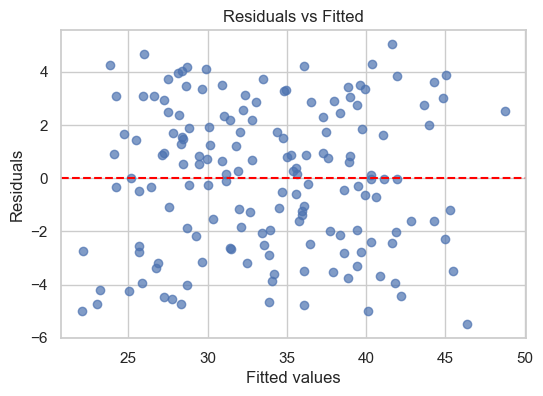

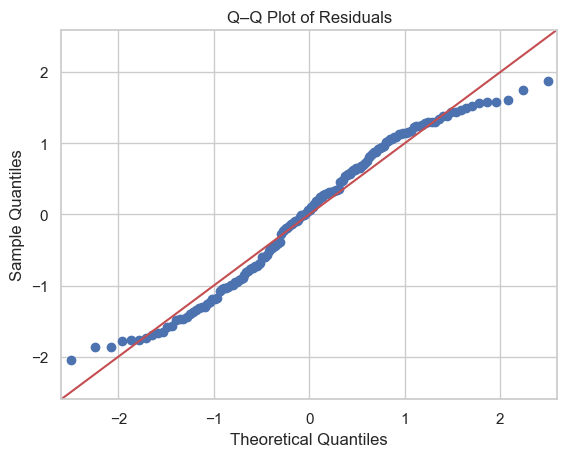

In [17]:
resid = model_sm.resid
fitted = model_sm.fittedvalues

plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

import statsmodels.api as sm
sm.qqplot(resid, line="45", fit=True)
plt.title("Q–Q Plot of Residuals")
plt.show()

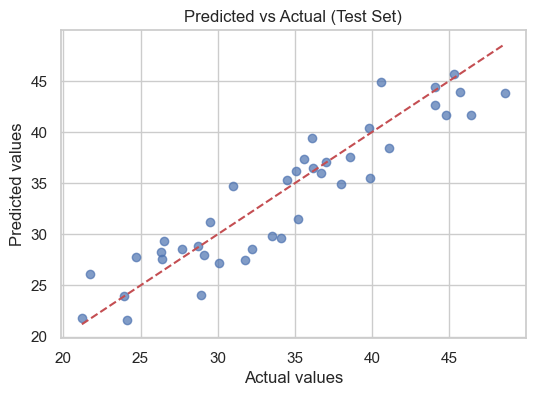

In [18]:
#Predicted vs. actual (on test data)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual (Test Set)")
plt.show()

/var/folders/xh/wb5t95t13jjdwwkhnnvxpwvr0000gn/T/ipykernel_31961/2680897836.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Variable", data=coef_df, palette="coolwarm")


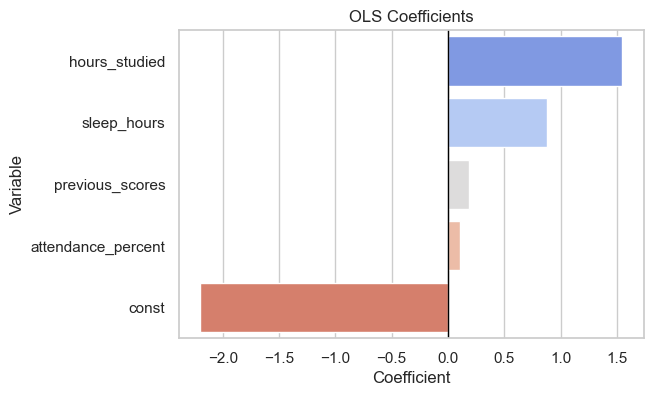

In [166]:
#Shows which variables have the strongest positive or negative effects.

coef_df = pd.DataFrame({
    "Variable": model_sm.params.index,
    "Coefficient": model_sm.params.values
}).sort_values("Coefficient", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x="Coefficient", y="Variable", data=coef_df, palette="coolwarm")
plt.axvline(0, color="black", linewidth=1)
plt.title("OLS Coefficients")
plt.show()

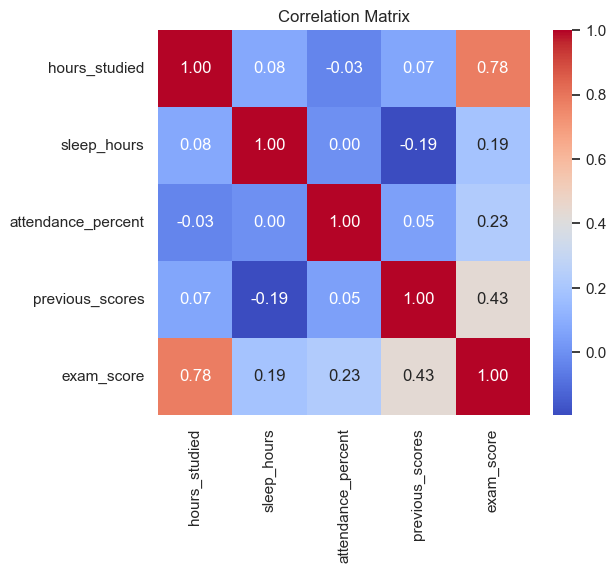

In [19]:
#Heatmap of correlations

corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

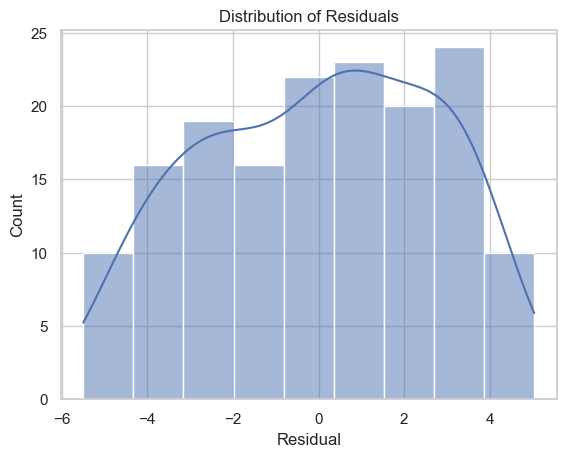

In [20]:
sns.histplot(resid, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()